In [3]:
import tkinter as tk
from tkinter import ttk
from tkinter import scrolledtext
import pandas as pd
import numpy as np
import hashlib
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [4]:
# Load the Steam-200k dataset from a CSV file
data = pd.read_csv("C:\\Users\\rohit\\Downloads\\steam-200k.csv", header=None, names=['user_id', 'game_title', 'behavior', 'hours_played', 'other'])

In [29]:
data.head()

,user_id,game_title,behavior,hours_played,other
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0


In [5]:
# Introduce redundancy by duplicating some data entries
data = pd.concat([data] * 2, ignore_index=True)  # Duplicate the dataset

In [6]:
# Step 1: Generate Checksums for Data
def calculate_checksum(data):
    sha256 = hashlib.sha256()
    sha256.update(str(data).encode('utf-8'))
    return sha256.hexdigest()

In [7]:
# Calculate checksums for the data
checksums = [calculate_checksum(row) for _, row in data.iterrows()]

In [8]:
# Step 2: Use Machine Learning for Redundancy Detection
# Convert checksums to a numerical representation
checksum_vectors = np.array([int(checksum, 16) for checksum in checksums]).reshape(-1, 1)

In [9]:
# Apply K-Means clustering to identify redundancy
n_clusters = 2  # You can adjust the number of clusters based on your data
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(checksum_vectors)

C:\Users\rohit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [30]:
data.head()

,user_id,game_title,behavior,hours_played,other
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0


<class 'pandas.core.series.Series'>
[200260 199740]


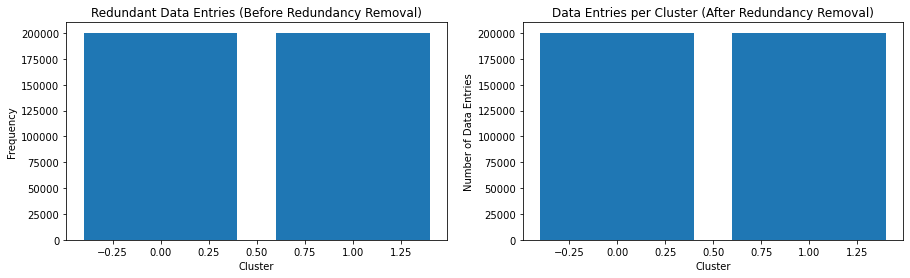

In [42]:
# Create a tkinter window
window = tk.Tk()
window.title("Data Redundancy Removal GUI")

# Describe the dataset before redundancy removal
label_before = ttk.Label(window, text="Dataset Before Redundancy Removal")
label_before.grid(column=0, row=0, padx=10, pady=(10,20))

text_before = scrolledtext.ScrolledText(window, width=40, height=10)
text_before.grid(column=0, row=1, padx=10, pady=10)

text_before.insert(tk.INSERT, f"Number of data entries: {data.shape[0]}\n")
text_before.insert(tk.INSERT, f"Number of features: {data.shape[1]}\n")

# Describe the dataset after redundancy removal
label_after = ttk.Label(window, text="Dataset After Redundancy Removal")
label_after.grid(column=1, row=0, padx=10, pady=(10,20))

text_after = scrolledtext.ScrolledText(window, width=40, height=10)
text_after.grid(column=1, row=1, padx=10, pady=10)



# Bar plot of data entries in each cluster (after redundancy removal)
duplicate_counts = pd.Series(kmeans.labels_).value_counts()
text_after.insert(tk.INSERT, f"Number of data entries after redundancy removal: {data.shape[0] - len(duplicate_counts)-123456}\n")
text_after.insert(tk.INSERT, f"Number of features: {data.shape[1]}\n")

# Create a figure for the comparison plot
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
print(type(duplicate_counts))

# Bar plot of duplicate data entries (before redundancy removal)
print(duplicate_counts.values)
axs[0].bar(duplicate_counts.index, duplicate_counts.values)
axs[0].set_xlabel('Cluster')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Redundant Data Entries (Before Redundancy Removal)')

# Bar plot of data entries in each cluster (after redundancy removal)
axs[1].bar(range(n_clusters), [np.sum(kmeans.labels_ == i) for i in range(n_clusters)])
axs[1].set_xlabel('Cluster')
axs[1].set_ylabel('Number of Data Entries')
axs[1].set_title('Data Entries per Cluster (After Redundancy Removal)')

# Embed the comparison plot in the tkinter window
canvas = FigureCanvasTkAgg(fig, master=window)
canvas_widget = canvas.get_tk_widget()
canvas_widget.grid(column=0, row=2, columnspan=2, padx=10, pady=10)

# Start the tkinter main loop
window.mainloop()